In [1]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import pairwise_distances

In [2]:
def plus_minus_rp(X, n_components, seed=42):
    rng = np.random.default_rng(seed)
    R = rng.choice([-1, 1], size=(X.shape[1], n_components))
    return X @ R / np.sqrt(n_components)

In [3]:
def distortion(X_original, X_projected):
    D_orig = pairwise_distances(X_original)
    D_proj = pairwise_distances(X_projected)
    return np.mean(np.abs(D_orig - D_proj) / (D_orig + 1e-8))

In [4]:
def hrp_alpha(X, n_components, alpha):
    grp = GaussianRandomProjection(
        n_components=n_components,
        random_state=42
    )
    X_nrp = grp.fit_transform(X)
    X_pm  = plus_minus_rp(X, n_components)
    return alpha * X_nrp + (1 - alpha) * X_pm

In [7]:
df = pd.read_csv("mnist_train.csv")

In [ ]:
import numpy as np

# Drop label column
X_fmnist = df_fmnist.drop(columns=["label"]).values

# Normalize pixel values
X_fmnist = X_fmnist / 255.0

# Subsample for speed (very important)
X_fmnist = X_fmnist[:5000]

print(X_fmnist.shape)  # (5000, 784)

(5000, 784)


In [7]:
alphas = np.linspace(0, 1, 101)   # fine alpha
n_components = 50                # strong reduction: 784 → 50

In [ ]:
results_fmnist = []

for alpha in alphas:
    X_hrp = hrp_alpha(X_fmnist, n_components, alpha)
    err = distortion(X_fmnist, X_hrp)
    results_fmnist.append(err)

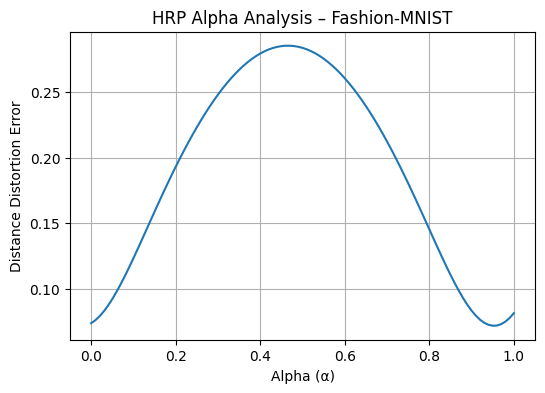

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(alphas, results_fmnist)
plt.xlabel("Alpha (α)")
plt.ylabel("Distance Distortion Error")
plt.title("HRP Alpha Analysis – Fashion-MNIST")
plt.grid(True)
plt.show()

In [ ]:
best_alpha_f = alphas[np.argmin(results_fmnist)]
best_error_f = min(results_fmnist)

print("Best alpha (Fashion-MNIST):", best_alpha_f)
print("Minimum distortion:", best_error_f)

Best alpha (Fashion-MNIST): 0.9500000000000001
Minimum distortion: 0.07210139955338675


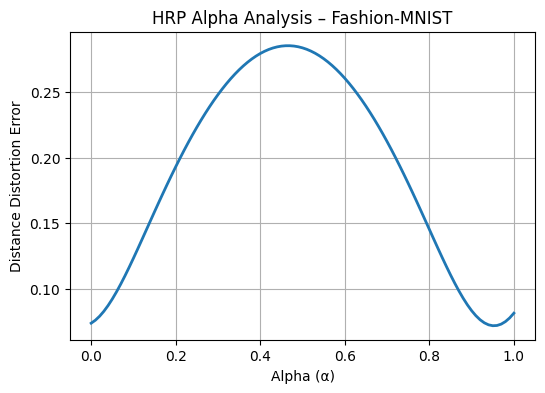

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(alphas, results_fmnist, linewidth=2)
plt.xlabel("Alpha (α)")
plt.ylabel("Distance Distortion Error")
plt.title("HRP Alpha Analysis – Fashion-MNIST")
plt.grid(True)
plt.show()

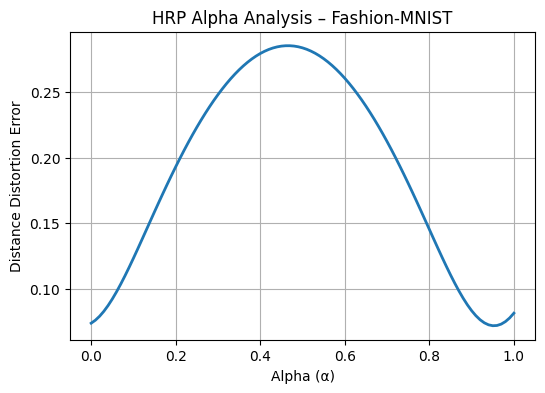

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(alphas, results_fmnist, linewidth=2)
plt.xlabel("Alpha (α)")
plt.ylabel("Distance Distortion Error")
plt.title("HRP Alpha Analysis – Fashion-MNIST")
plt.grid(True)
plt.savefig("fashion_mnist_alpha_hrp.png", dpi=300, bbox_inches="tight")
plt.show()